In [22]:
import matplotlib.pyplot as plt
import numpy as np

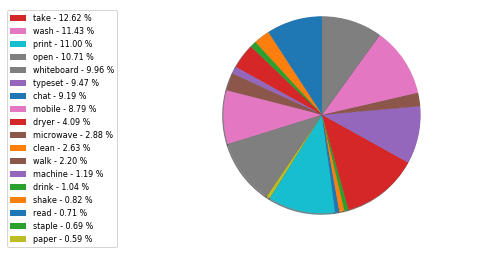

In [29]:
x = np.char.array(['chat', 'clean', 'drink', 'dryer', 'machine', 'microwave', 'mobile', 'open', 'paper', 'print', 'read', 'shake', 'staple', 'take', 'typeset', 'walk', 'wash',  'whiteboard', 'write'])
y = np.array([20799, 5944, 2349, 9254, 2690, 6528, 19884, 24246, 1340, 24885, 1610, 1846, 1560, 28561, 21431, 4983, 25867, 22540])
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
porcent = 100.*y/y.sum()

fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(y, shadow=True, startangle=90, radius=2.0)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.savefig('imbalance.png',bbox_inches='tight')

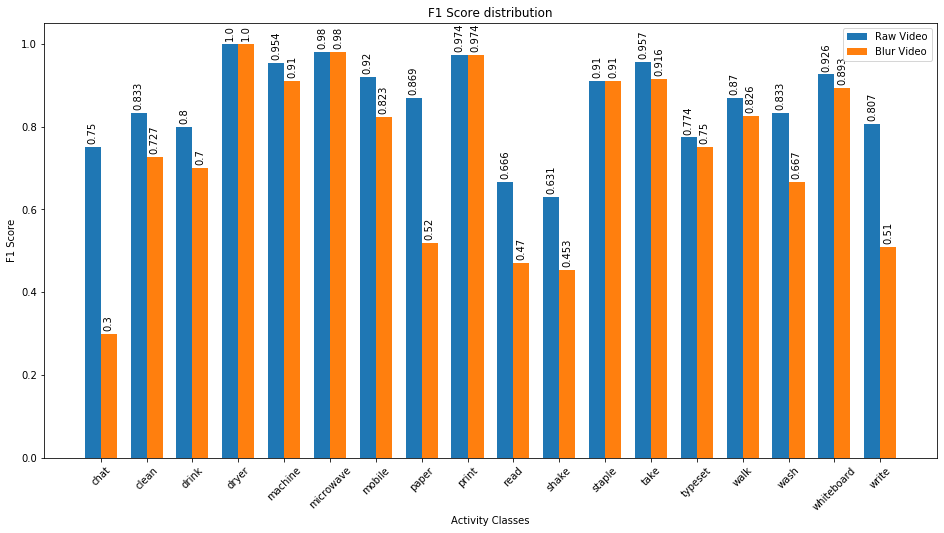

In [47]:
classes = ['chat', 'clean', 'drink', 'dryer', 'machine', 'microwave', 'mobile', 'paper', 'print', 'read', 'shake', 'staple', 'take', 'typeset', 'walk', 'wash', 'whiteboard', 'write']
raw_score = [0.75, 0.833, 0.8, 1.0, 0.954, 0.98, 0.92, 0.869, 0.974, 0.666, 0.631, 0.91, 0.957, 0.774, 0.87, 0.833, 0.926, 0.807]
blur_score = [0.3, 0.727, 0.7, 1.0, 0.91, 0.98, 0.823, 0.52, 0.974, 0.47, 0.453, 0.91, 0.916, 0.75, 0.826, 0.667, 0.893, 0.51]

x = np.arange(len(classes))  # the label locations
width = 0.35  # the width of the bars

#fig, ax = plt.subplots()
fig = plt.figure(1, [16, 8])
ax = fig.add_subplot(111)
rects1 = ax.bar(x - width/2, raw_score, width, label='Raw Video')
rects2 = ax.bar(x + width/2, blur_score, width, label='Blur Video')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Score')
ax.set_xlabel('Activity Classes')
ax.set_title('F1 Score distribution')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',rotation=90)


autolabel(rects1)
autolabel(rects2)
plt.setp(ax.get_xticklabels(), rotation=45)
#fig.tight_layout()

plt.savefig('class-wise_f1.png',bbox_inches='tight')